[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schwartz-cnl/Computational-Neuroscience-Class/blob/main/Convolutional%20Neural%20Network/Visualize_GaborlikeAlexnet_class_2025.ipynb)

In [30]:
# Initial code generated by ChatGPT and edited by OS 2025
# We want to visualize the first convolutional layer of Alexnet filters
# We will use a pretrained model from Pytorch

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.stats import rayleigh
import sys
import os

from torchvision import models

model = models.alexnet(weights='DEFAULT')
print(model)
first_conv_layer = model.features[0]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [31]:
# We can visualize first layer filters directly. See how they are qualitatively
# similar to what we saw with ICA and to V1 oriented Gabor-like filters

first_conv_layer = model.features[0]
print(first_conv_layer)

# Extract the weights from the first convolutional layer
filters = first_conv_layer.weight.data.cpu().numpy()  # Convert to NumPy for visualization




Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


(64, 3, 11, 11)


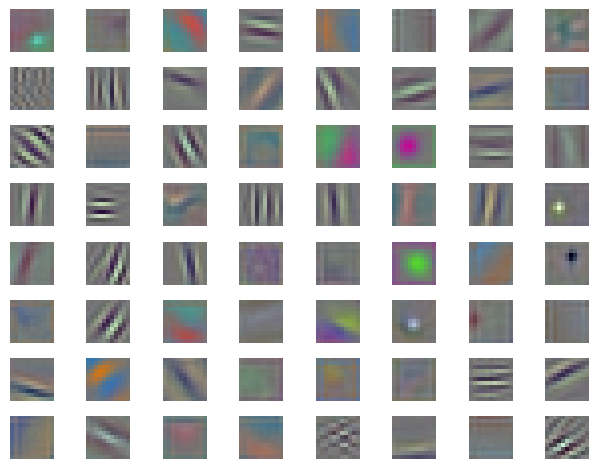

In [34]:
# Visualization of first layer filters

# Normalize filters
def normalize_filters(filters):
    return (filters - filters.min()) / (filters.max() - filters.min())

normfilters = normalize_filters(filters)
print(normfilters.shape)

fig, axes = plt.subplots(8, 8)
for i, ax in enumerate(axes.flat):
    if i < normfilters.shape[0]:
        filter_img = np.transpose(normfilters[i], (1, 2, 0))  # Transpose to (Height, Width, Color) since was (Color, Height, Width)
        ax.imshow(filter_img)
    ax.axis('off')
plt.tight_layout()
plt.show()


